In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np 
import os,sys
from PIL import Image
import matplotlib.pyplot as plot
from optparse import OptionParser
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras import models
from keras import layers
from keras import optimizers

In [0]:
def grayscale(picture):
    res= Image.new(picture.mode, picture.size)
    width, height = picture.size

    for i in range(0, width):
        for j in range(0, height):
            pixel=picture.getpixel((i,j))
            avg=int((pixel[0]+pixel[1]+pixel[2])/3)
            res.putpixel((i,j),(avg,avg,avg))
    res.show()
    return res

In [0]:
def normalize(picture):
    width, height = picture.size
    normalized_array = []
    for j in range(0, height):
	    for i in range(0, width):
		    pixel = picture.getpixel((i,j))
		    normalized_array.append( pixel[0] / 255.0 )
    return np.array(normalized_array)

In [0]:
def loadIsCar():
  model = load_model('/content/car_detection_keras_CNN_model.h5')
  return model

In [0]:
def isCar(imgpath,model):
  row,column = 100,100
  img = Image.open(imgpath)

  img = img.resize((row,column),Image.ANTIALIAS)
  gray_image = grayscale(img)

  X_test = normalize(gray_image)
  X_test = X_test.reshape(1, row, column, 1)  # (1, row, column) 3D input for CNN 

  classes = model.predict(X_test)
  maxVal = classes[0].max()
  indexVal = np.where(classes[0]==maxVal) # result is an array
  
  if (indexVal[0] == 0):
      return 1
  else: 
      return 0


In [0]:
def loadIsDamaged():
  image_size = 150
  #Load the VGG model
  vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

  # Freeze the layers except the last 4 layers
  for layer in vgg_conv.layers[:-4]:
      layer.trainable = False

  # Create the model
  model = models.Sequential()
  
  # Add the vgg convolutional base model
  model.add(vgg_conv)
  
  # Add new layers
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(2, activation='softmax'))
  
  # Show a summary of the model. Check the number of trainable parameters
  model.summary()

  model.load_weights('/content/drive/My Drive/dataset_zapsure/dmgornot_weights.h5')
  return model

In [0]:
def isDamaged(imgpath,model):
  image_size = 150 
  img = Image.open(imgpath).resize((image_size,image_size))
  img_arr = np.expand_dims(img_to_array(img), axis=0)

  image = preprocess_input(img_arr)
  prediction = model.predict(image)

  maxval = prediction.max()
  if(maxval == prediction[0][0]):
    return 1
  else:
    return 0

In [0]:
def loadDmgLoc():
  image_size = 150
  #Load the VGG model
  vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

  # Freeze the layers except the last 4 layers
  for layer in vgg_conv.layers[:-4]:
      layer.trainable = False

  # Create the model
  model = models.Sequential()
  
  # Add the vgg convolutional base model
  model.add(vgg_conv)
  
  # Add new layers
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(3, activation='softmax'))
  
  # Show a summary of the model. Check the number of trainable parameters
  model.summary()

  model.load_weights('/content/drive/My Drive/dataset_zapsure/dmgloc_weights.h5')
  return model

In [0]:
def dmgLoc(imgpath,model):
  image_size = 150
  img = Image.open(imgpath).resize((image_size,image_size))
  img_arr = np.expand_dims(img_to_array(img), axis=0)

  image = preprocess_input(img_arr)
  prediction = model.predict(image)

  maxval = prediction.max()
  if(maxval == prediction[0][0]):
    return 0
  elif(maxval == prediction[0][1]):
    return 1
  else:
    return 2


In [0]:
def loadDmgSev():
  image_size = 150
  #Load the VGG model
  vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

  # Freeze the layers except the last 4 layers
  for layer in vgg_conv.layers[:-4]:
      layer.trainable = False

  # Create the model
  model = models.Sequential()
  
  # Add the vgg convolutional base model
  model.add(vgg_conv)
  
  # Add new layers
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(3, activation='softmax'))
  
  # Show a summary of the model. Check the number of trainable parameters
  model.summary()

  model.load_weights('/content/drive/My Drive/dataset_zapsure/dmgsev_weights.h5')
  return model


In [0]:
def dmgSev(imgpath,model):
  image_size = 150
  img = Image.open(imgpath).resize((image_size,image_size))
  img_arr = np.expand_dims(img_to_array(img), axis=0)

  image = preprocess_input(img_arr)
  prediction = model.predict(image)

  maxval = prediction.max()
  if(maxval == prediction[0][0]):
    return 0
  elif(maxval == prediction[0][1]):
    return 1
  else:
    return 2


In [188]:
model0 = loadIsCar()
model1 = loadIsDamaged()
model2 = loadDmgLoc ()
model3 = loadDmgSev ()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_31 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
dropout_31 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 2050      
Total params: 23,106,370
Trainable params: 15,471,106
Non-trainable params: 7,635,264
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              P

In [0]:
def calclaim (cost,dmg,loc,sev):
  if(dmg==0 and sev==0):
    return 0.25
  cnt = 1
  if(loc == 1 ):
    cnt *= 2
  else:
    cnt *= 3

  if (sev == 0):
    cnt *= 0.5
  elif(sev==1):
    cnt *= 3
  else:
    cnt *= 7

  if (cost==0):
    cnt *= 1
  elif(sev==1):
    cnt *= 1.5
  else:
    cnt *= 4
  
  return cnt

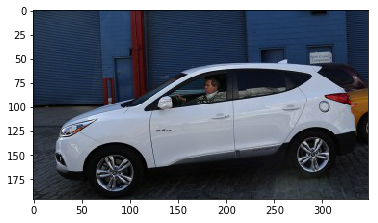

is car: 1 cost: 1 is damaged: 0 damage loc: 2 sev: 0
Estimate = ₹ 250.0


In [200]:
path = '/content/1.jpg'
 
image = mpimg.imread(path)
plt.imshow(image)
plt.show()

cost = 1 # 0 cheap; 1 moderate; 3 costly
car = (isCar(path,model0))
dmg = (isDamaged(path,model1))
loc = (dmgLoc(path,model2))
sev = (dmgSev(path,model3))
print("is car:",car,"cost:",cost,"is damaged:",dmg,"damage loc:",loc,"sev:",sev,sep=' ')
print("Estimate = ₹", calclaim(cost,dmg,loc,sev)*1000)
